# Load dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# Select sports and politics related categories
categories = [
    'rec.sport.baseball',
    'rec.sport.hockey',
    'talk.politics.misc',
    'talk.politics.guns',
    'talk.politics.mideast'
]

# Load dataset and remove metadata to avoid bias
newsgroups = fetch_20newsgroups(
    subset='all',
    categories=categories,
    remove=('headers', 'footers', 'quotes')
)

# Create dataframe
df = pd.DataFrame({
    'text': newsgroups.data,
    'original_label': newsgroups.target
})

# Map multi-class labels into binary classes
label_mapping = {
    0: 'sport',
    1: 'sport',
    2: 'politics',
    3: 'politics',
    4: 'politics'
}

df['category'] = df['original_label'].map(label_mapping)

# Keep only text and final category
df = df[['text', 'category']]

print("Total Documents:", len(df))
print("\nClass Distribution:")
print(df['category'].value_counts())

print("\nSample Document:\n")
print(df['text'].iloc[0][:500])


Total Documents: 4618

Class Distribution:
category
politics    2625
sport       1993
Name: count, dtype: int64

Sample Document:



Well over 100,000 in Lebanon alone.
1,000,000 - 2,000,000 in the Iran/Iraq conflict, even if Iranians
aren't Arabs, strictly speaking.  (They seem to hate the Zionists at
least as much as anyone else in the neighborhood.  Is there some
correlation perhaps between hating Israel and killing off your own
people?)



# Statistics

In [ ]:
df['doc_length'] = df['text'].apply(lambda x: len(x.split()))

print("Average Document Length:", df['doc_length'].mean())
print("Minimum Document Length:", df['doc_length'].min())
print("Maximum Document Length:", df['doc_length'].max())


Average Document Length: 223.8124729320052
Minimum Document Length: 0
Maximum Document Length: 11251


# EDA CODE

##  Basic Dataset Information

In [ ]:
print("Dataset Shape:", df.shape)
print("\nClass Distribution:\n")
print(df['category'].value_counts())


Dataset Shape: (4618, 3)

Class Distribution:

category
politics    2625
sport       1993
Name: count, dtype: int64


## Document Length Analysis

In [ ]:
import matplotlib.pyplot as plt

# Calculate document length (number of words)
df['doc_length'] = df['text'].apply(lambda x: len(x.split()))

print("Average Document Length:", df['doc_length'].mean())
print("Minimum Document Length:", df['doc_length'].min())
print("Maximum Document Length:", df['doc_length'].max())


Average Document Length: 223.8124729320052
Minimum Document Length: 0
Maximum Document Length: 11251


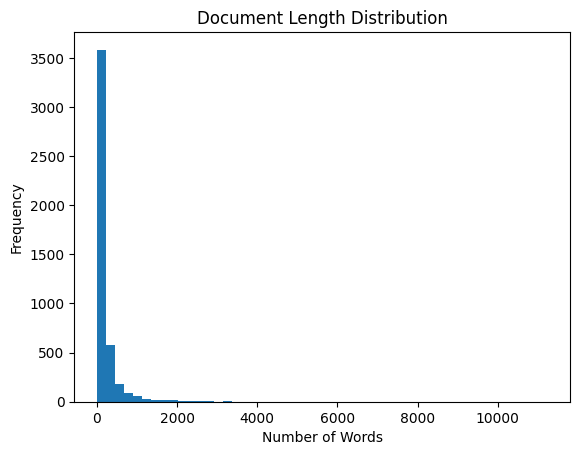

In [ ]:
plt.figure()
plt.hist(df['doc_length'], bins=50)
plt.title("Document Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## Check Class Balance Visually

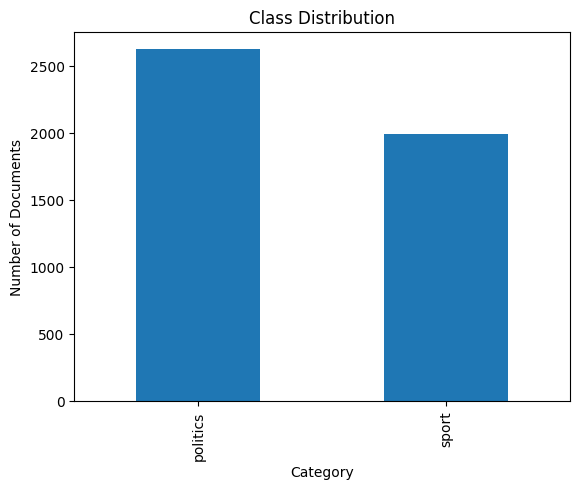

In [ ]:
df['category'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Documents")
plt.show()


## Most Frequent Words

In [ ]:
import re
from collections import Counter

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

all_words = []

for text in df['text']:
    cleaned = clean_text(text)
    words = cleaned.split()
    all_words.extend(words)

word_counts = Counter(all_words)

print("Top 20 Most Common Words:\n")
print(word_counts.most_common(20))


Top 20 Most Common Words:

[('the', 57489), ('to', 26012), ('of', 24784), ('and', 21634), ('a', 18995), ('in', 17356), ('that', 14468), ('i', 12397), ('is', 11257), ('it', 8563), ('you', 7891), ('for', 7788), ('was', 7167), ('on', 6936), ('they', 6319), ('have', 6074), ('this', 6039), ('not', 5896), ('are', 5641), ('be', 5624)]


## Most Frequent Words Per Class

In [ ]:
sport_words = []
politics_words = []

for index, row in df.iterrows():
    cleaned = clean_text(row['text'])
    words = cleaned.split()

    if row['category'] == 'sport':
        sport_words.extend(words)
    else:
        politics_words.extend(words)

sport_counter = Counter(sport_words)
politics_counter = Counter(politics_words)

print("Top 15 Sport Words:\n")
print(sport_counter.most_common(15))

print("\nTop 15 Politics Words:\n")
print(politics_counter.most_common(15))


Top 15 Sport Words:

[('the', 14187), ('to', 5927), ('a', 5578), ('and', 4656), ('of', 4394), ('in', 4356), ('i', 3563), ('that', 3005), ('is', 2881), ('for', 2248), ('he', 2005), ('was', 1987), ('it', 1982), ('on', 1905), ('have', 1650)]

Top 15 Politics Words:

[('the', 43302), ('of', 20390), ('to', 20085), ('and', 16978), ('a', 13417), ('in', 13000), ('that', 11463), ('i', 8834), ('is', 8376), ('it', 6581), ('you', 6324), ('for', 5540), ('was', 5180), ('they', 5031), ('on', 5031)]


# Text Preprocessing and Feature Engineering

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 3694
Testing samples: 924


## Bag of Words (CountVectorizer)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.7
)

X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

print("BoW Feature Shape:", X_train_bow.shape)


BoW Feature Shape: (3694, 33452)


## TF-IDF Representation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.7
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Feature Shape:", X_train_tfidf.shape)


TF-IDF Feature Shape: (3694, 33452)


## TF-IDF with Bigrams (n-grams)

In [ ]:
tfidf_bigram = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),
    max_df=0.7
)

X_train_bigram = tfidf_bigram.fit_transform(X_train)
X_test_bigram = tfidf_bigram.transform(X_test)

print("TF-IDF Bigram Feature Shape:", X_train_bigram.shape)


TF-IDF Bigram Feature Shape: (3694, 326872)


# Train and Compare 3 ML Models

## Import Required Models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Train Models on TF-IDF Features (Baseline Comparison)

## Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_pred = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.933982683982684

Classification Report:

              precision    recall  f1-score   support

    politics       0.90      1.00      0.94       525
       sport       0.99      0.85      0.92       399

    accuracy                           0.93       924
   macro avg       0.95      0.92      0.93       924
weighted avg       0.94      0.93      0.93       924



## Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

lr_pred = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.9264069264069265

Classification Report:

              precision    recall  f1-score   support

    politics       0.89      1.00      0.94       525
       sport       0.99      0.83      0.91       399

    accuracy                           0.93       924
   macro avg       0.94      0.92      0.92       924
weighted avg       0.93      0.93      0.93       924



## Support Vector Machine (Linear SVM)

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

svm_pred = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.9383116883116883

Classification Report:

              precision    recall  f1-score   support

    politics       0.91      0.99      0.95       525
       sport       0.98      0.87      0.92       399

    accuracy                           0.94       924
   macro avg       0.95      0.93      0.94       924
weighted avg       0.94      0.94      0.94       924



## Confusion Matrix (For Best Model)

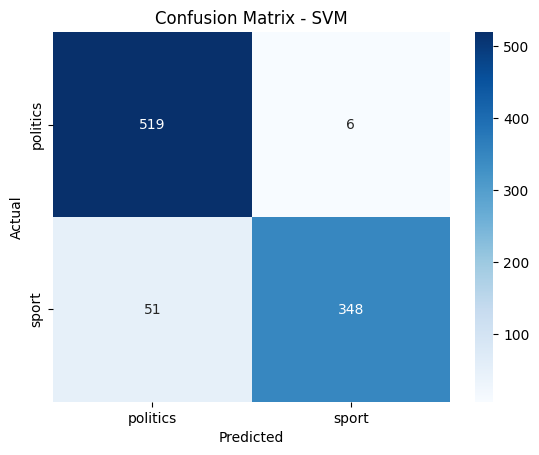

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, svm_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['politics','sport'],
            yticklabels=['politics','sport'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Create Comparison Table

In [ ]:
results = {
    "Model": ["Naive Bayes", "Logistic Regression", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, svm_pred)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0          Naive Bayes  0.933983
1  Logistic Regression  0.926407
2                  SVM  0.938312


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create dictionary to store results
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

models = {
    "Naive Bayes": nb_pred,
    "Logistic Regression": lr_pred,
    "SVM": svm_pred
}

for name, pred in models.items():
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, pred))
    metrics["Precision"].append(precision_score(y_test, pred, average='weighted'))
    metrics["Recall"].append(recall_score(y_test, pred, average='weighted'))
    metrics["F1-Score"].append(f1_score(y_test, pred, average='weighted'))

results_df = pd.DataFrame(metrics)
results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Naive Bayes,0.933983,0.939876,0.933983,0.933143
1,Logistic Regression,0.926407,0.933755,0.926407,0.925312
2,SVM,0.938312,0.941844,0.938312,0.937736


# Final Prediction Function

In [ ]:
def predict_text(text, model, vectorizer):
    vec = vectorizer.transform([text])
    prediction = model.predict(vec)
    return prediction[0]


In [ ]:
sample_text = "The government passed a new policy regarding international trade agreements."

prediction = predict_text(sample_text, svm_model, tfidf_vectorizer)

print("Input Text:\n", sample_text)
print("\nPredicted Category:", prediction)

Input Text:
 The government passed a new policy regarding international trade agreements.

Predicted Category: politics
